In [77]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from collections import Counter
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
from matplotlib import pyplot

# Import our input dataset
supply_chain_df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
supply_chain_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [18]:
#Remove un-needed columns
supply_chain_clean_df = supply_chain_df.drop(columns=["Customer Email","Customer Fname","Category Id","Customer Lname","Customer Password","Customer City","Customer Id","Customer Street","Customer Zipcode",
                                                      "Latitude","Longitude","Department Id","Department Name","Order Customer Id","Order Id","Order Item Cardprod Id","Order Item Product Price","Order Item Discount",
                                                     "Product Card Id","Product Category Id","Product Description","Product Name","Product Price","Product Image","Order Zipcode","Sales per customer","Delivery Status",
                                                     "Order City","Order Item Discount Rate","Sales","Order Status","Product Status","order date (DateOrders)","shipping date (DateOrders)","Days for shipping (real)","Days for shipment (scheduled)"])
supply_chain_clean_df.head()

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Country,Customer Segment,Customer State,Market,Order Country,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Shipping Mode
0,DEBIT,91.250000,0,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,Indonesia,180517,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,Standard Class
1,TRANSFER,-249.089996,1,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,India,179254,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,Standard Class
2,CASH,-247.779999,0,Sporting Goods,EE. UU.,Consumer,CA,Pacific Asia,India,179253,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,Standard Class
3,DEBIT,22.860001,0,Sporting Goods,EE. UU.,Home Office,CA,Pacific Asia,Australia,179252,0.08,1,304.809998,22.860001,Oceania,Queensland,Standard Class
4,PAYMENT,134.210007,0,Sporting Goods,Puerto Rico,Corporate,PR,Pacific Asia,Australia,179251,0.45,1,298.250000,134.210007,Oceania,Queensland,Standard Class


In [19]:
data_types_df = pd.DataFrame(supply_chain_clean_df.dtypes)
data_types_df

,0
Type,object
Benefit per order,float64
Late_delivery_risk,int64
Category Name,object
Customer Country,object
Customer Segment,object
Customer State,object
Market,object
Order Country,object
Order Item Id,int64


In [20]:
supply_chain_clean_df = supply_chain_clean_df.dropna(axis='columns', how='all')
supply_chain_clean_df

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Country,Customer Segment,Customer State,Market,Order Country,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Shipping Mode
0,DEBIT,91.250000,0,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,Indonesia,180517,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,Standard Class
1,TRANSFER,-249.089996,1,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,India,179254,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,Standard Class
2,CASH,-247.779999,0,Sporting Goods,EE. UU.,Consumer,CA,Pacific Asia,India,179253,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,Standard Class
3,DEBIT,22.860001,0,Sporting Goods,EE. UU.,Home Office,CA,Pacific Asia,Australia,179252,0.08,1,304.809998,22.860001,Oceania,Queensland,Standard Class
4,PAYMENT,134.210007,0,Sporting Goods,Puerto Rico,Corporate,PR,Pacific Asia,Australia,179251,0.45,1,298.250000,134.210007,Oceania,Queensland,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,40.000000,0,Fishing,EE. UU.,Home Office,NY,Pacific Asia,China,65177,0.10,1,399.980011,40.000000,Eastern Asia,Shanghái,Standard Class
180515,DEBIT,-613.770019,1,Fishing,EE. UU.,Corporate,CA,Pacific Asia,Japón,65161,-1.55,1,395.980011,-613.770019,Eastern Asia,Osaka,Second Class
180516,TRANSFER,141.110001,1,Fishing,EE. UU.,Corporate,CT,Pacific Asia,Australia,65129,0.36,1,391.980011,141.110001,Oceania,Australia del Sur,Standard Class
180517,PAYMENT,186.229996,0,Fishing,Puerto Rico,Consumer,PR,Pacific Asia,Australia,65126,0.48,1,387.980011,186.229996,Oceania,Australia del Sur,Standard Class


In [21]:
# Remove Null columns
supply_chain_clean_df = supply_chain_clean_df.dropna()
supply_chain_clean_df

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Country,Customer Segment,Customer State,Market,Order Country,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Shipping Mode
0,DEBIT,91.250000,0,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,Indonesia,180517,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,Standard Class
1,TRANSFER,-249.089996,1,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,India,179254,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,Standard Class
2,CASH,-247.779999,0,Sporting Goods,EE. UU.,Consumer,CA,Pacific Asia,India,179253,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,Standard Class
3,DEBIT,22.860001,0,Sporting Goods,EE. UU.,Home Office,CA,Pacific Asia,Australia,179252,0.08,1,304.809998,22.860001,Oceania,Queensland,Standard Class
4,PAYMENT,134.210007,0,Sporting Goods,Puerto Rico,Corporate,PR,Pacific Asia,Australia,179251,0.45,1,298.250000,134.210007,Oceania,Queensland,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,40.000000,0,Fishing,EE. UU.,Home Office,NY,Pacific Asia,China,65177,0.10,1,399.980011,40.000000,Eastern Asia,Shanghái,Standard Class
180515,DEBIT,-613.770019,1,Fishing,EE. UU.,Corporate,CA,Pacific Asia,Japón,65161,-1.55,1,395.980011,-613.770019,Eastern Asia,Osaka,Second Class
180516,TRANSFER,141.110001,1,Fishing,EE. UU.,Corporate,CT,Pacific Asia,Australia,65129,0.36,1,391.980011,141.110001,Oceania,Australia del Sur,Standard Class
180517,PAYMENT,186.229996,0,Fishing,Puerto Rico,Consumer,PR,Pacific Asia,Australia,65126,0.48,1,387.980011,186.229996,Oceania,Australia del Sur,Standard Class


In [22]:
supply_chain_clean_10_df = supply_chain_clean_df.head(18000)


In [23]:
columns = supply_chain_clean_10_df.index
target = ["Late_delivery_risk"]

In [24]:
# Convert Late delivery risk
x = {1: 'sent late',0: 'sent on time'}  
# Change tarrget to difference betweenn days for shipping real and days for shipment scheduled
supply_chain_clean_10_df["Late_delivery_risk"] = supply_chain_clean_10_df["Late_delivery_risk"].replace(x)
supply_chain_clean_10_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Country,Customer Segment,Customer State,Market,Order Country,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Shipping Mode
0,DEBIT,91.250000,sent on time,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,Indonesia,180517,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,Standard Class
1,TRANSFER,-249.089996,sent late,Sporting Goods,Puerto Rico,Consumer,PR,Pacific Asia,India,179254,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,Standard Class
2,CASH,-247.779999,sent on time,Sporting Goods,EE. UU.,Consumer,CA,Pacific Asia,India,179253,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,Standard Class
3,DEBIT,22.860001,sent on time,Sporting Goods,EE. UU.,Home Office,CA,Pacific Asia,Australia,179252,0.08,1,304.809998,22.860001,Oceania,Queensland,Standard Class
4,PAYMENT,134.210007,sent on time,Sporting Goods,Puerto Rico,Corporate,PR,Pacific Asia,Australia,179251,0.45,1,298.250000,134.210007,Oceania,Queensland,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,CASH,30.260000,sent late,Men's Footwear,EE. UU.,Corporate,CA,Europe,Francia,46913,0.24,1,126.089996,30.260000,Western Europe,Languedoc-Rosellón-Mediodía-Pirineos,Second Class
17996,CASH,30.170000,sent late,Children's Clothing,EE. UU.,Corporate,CA,Europe,Italia,173763,0.09,1,342.820007,30.170000,Southern Europe,Emilia-Romaña,Second Class
17997,CASH,20.910000,sent late,Cleats,EE. UU.,Corporate,CO,Europe,Bosnia y Herzegovina,120928,0.36,1,57.590000,20.910000,Southern Europe,Federación de Bosnia y Herzegovina,Second Class
17998,CASH,16.530001,sent late,Cleats,EE. UU.,Corporate,CA,Europe,Francia,169860,0.29,1,56.990002,16.530001,Western Europe,Borgoña-Franco Condado,Second Class


In [25]:
# Create our features
X = supply_chain_clean_10_df.drop("Late_delivery_risk", axis=1)

X = pd.get_dummies(X)

# Create our target
y = supply_chain_clean_10_df["Late_delivery_risk"]

In [26]:
X.describe()

,Benefit per order,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,...,Order State_Zhejiang,Order State_Zhytómyr,Order State_Zulia,Order State_Zúrich,Order State_iauliai,Order State_Équateur,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,23.018066,89795.299222,0.124127,2.634444,187.855219,23.018066,0.208722,0.402722,0.114056,0.274500,...,0.001000,0.000056,0.000889,0.000611,0.000111,0.000222,0.123556,0.038667,0.212000,0.625778
std,111.730532,52568.452466,0.462575,1.599743,128.003787,111.730532,0.406407,0.490459,0.317888,0.446274,...,0.031608,0.007454,0.029802,0.024714,0.010541,0.014906,0.329083,0.192805,0.408736,0.483935
min,-3366.000000,35.000000,-2.750000,1.000000,8.470000,-3366.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.660000,44573.500000,0.080000,1.000000,106.209999,7.660000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.279999,86613.000000,0.270000,2.000000,163.979996,32.279999,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.489998,134234.000000,0.360000,4.000000,251.984997,67.489998,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,684.000000,180519.000000,0.500000,5.000000,1759.989990,684.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Check the balance of our target values
y.value_counts()

sent late       9727
sent on time    8273
Name: Late_delivery_risk, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'sent late': 7211, 'sent on time': 7211})

In [30]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [31]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5030887000615416

In [34]:
# Remove remaining location data
sc_market_df = supply_chain_clean_10_df.drop(columns=["Customer Country","Customer State","Order Country","Order Region","Order State"])

In [35]:
columns = sc_market_df.index
target = ["Late_delivery_risk"]

In [36]:
# Convert Late delivery risk
x = {1: 'sent late',0: 'sent on time'}  
# Change tarrget to difference betweenn days for shipping real and days for shipment scheduled
sc_market_df["Late_delivery_risk"] = sc_market_df["Late_delivery_risk"].replace(x)
sc_market_df

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Segment,Market,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Shipping Mode
0,DEBIT,91.250000,sent on time,Sporting Goods,Consumer,Pacific Asia,180517,0.29,1,314.640015,91.250000,Standard Class
1,TRANSFER,-249.089996,sent late,Sporting Goods,Consumer,Pacific Asia,179254,-0.80,1,311.359985,-249.089996,Standard Class
2,CASH,-247.779999,sent on time,Sporting Goods,Consumer,Pacific Asia,179253,-0.80,1,309.720001,-247.779999,Standard Class
3,DEBIT,22.860001,sent on time,Sporting Goods,Home Office,Pacific Asia,179252,0.08,1,304.809998,22.860001,Standard Class
4,PAYMENT,134.210007,sent on time,Sporting Goods,Corporate,Pacific Asia,179251,0.45,1,298.250000,134.210007,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,CASH,30.260000,sent late,Men's Footwear,Corporate,Europe,46913,0.24,1,126.089996,30.260000,Second Class
17996,CASH,30.170000,sent late,Children's Clothing,Corporate,Europe,173763,0.09,1,342.820007,30.170000,Second Class
17997,CASH,20.910000,sent late,Cleats,Corporate,Europe,120928,0.36,1,57.590000,20.910000,Second Class
17998,CASH,16.530001,sent late,Cleats,Corporate,Europe,169860,0.29,1,56.990002,16.530001,Second Class


In [38]:
# Create our features
X = sc_market_df.drop("Late_delivery_risk", axis=1)

X = pd.get_dummies(X)

# Create our target
y = sc_market_df["Late_delivery_risk"]

In [39]:
X.describe()

,Benefit per order,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,...,Customer Segment_Home Office,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,23.018066,89795.299222,0.124127,2.634444,187.855219,23.018066,0.208722,0.402722,0.114056,0.274500,...,0.165778,0.063444,0.311500,0.247667,0.247611,0.129778,0.123556,0.038667,0.212000,0.625778
std,111.730532,52568.452466,0.462575,1.599743,128.003787,111.730532,0.406407,0.490459,0.317888,0.446274,...,0.371891,0.243767,0.463119,0.431669,0.431637,0.336068,0.329083,0.192805,0.408736,0.483935
min,-3366.000000,35.000000,-2.750000,1.000000,8.470000,-3366.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.660000,44573.500000,0.080000,1.000000,106.209999,7.660000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.279999,86613.000000,0.270000,2.000000,163.979996,32.279999,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.489998,134234.000000,0.360000,4.000000,251.984997,67.489998,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,684.000000,180519.000000,0.500000,5.000000,1759.989990,684.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Check the balance of our target values
y.value_counts()

sent late       9727
sent on time    8273
Name: Late_delivery_risk, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'sent late': 7211, 'sent on time': 7211})

In [43]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [44]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5028366839325094

In [56]:
sc_market_df.dtypes

Type                        object
Benefit per order          float64
Late_delivery_risk          object
Category Name               object
Customer Segment            object
Market                      object
Order Item Id                int64
Order Item Profit Ratio    float64
Order Item Quantity          int64
Order Item Total           float64
Order Profit Per Order     float64
Shipping Mode               object
dtype: object

In [58]:
sc_cleanest_df = sc_market_df.drop(columns=["Order Item Id","Order Item Profit Ratio","Order Item Quantity","Order Item Total","Order Profit Per Order"])
sc_cleanest_df
                                   

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Segment,Market,Shipping Mode
0,DEBIT,91.250000,sent on time,Sporting Goods,Consumer,Pacific Asia,Standard Class
1,TRANSFER,-249.089996,sent late,Sporting Goods,Consumer,Pacific Asia,Standard Class
2,CASH,-247.779999,sent on time,Sporting Goods,Consumer,Pacific Asia,Standard Class
3,DEBIT,22.860001,sent on time,Sporting Goods,Home Office,Pacific Asia,Standard Class
4,PAYMENT,134.210007,sent on time,Sporting Goods,Corporate,Pacific Asia,Standard Class
...,...,...,...,...,...,...,...
17995,CASH,30.260000,sent late,Men's Footwear,Corporate,Europe,Second Class
17996,CASH,30.170000,sent late,Children's Clothing,Corporate,Europe,Second Class
17997,CASH,20.910000,sent late,Cleats,Corporate,Europe,Second Class
17998,CASH,16.530001,sent late,Cleats,Corporate,Europe,Second Class


In [59]:
columns = sc_cleanest_df.index
target = ["Late_delivery_risk"]

In [61]:
# Convert Late delivery risk
x = {1: 'sent late',0: 'sent on time'}  
# Change tarrget to difference betweenn days for shipping real and days for shipment scheduled
sc_cleanest_df["Late_delivery_risk"] = sc_cleanest_df["Late_delivery_risk"].replace(x)
sc_cleanest_df

,Type,Benefit per order,Late_delivery_risk,Category Name,Customer Segment,Market,Shipping Mode
0,DEBIT,91.250000,sent on time,Sporting Goods,Consumer,Pacific Asia,Standard Class
1,TRANSFER,-249.089996,sent late,Sporting Goods,Consumer,Pacific Asia,Standard Class
2,CASH,-247.779999,sent on time,Sporting Goods,Consumer,Pacific Asia,Standard Class
3,DEBIT,22.860001,sent on time,Sporting Goods,Home Office,Pacific Asia,Standard Class
4,PAYMENT,134.210007,sent on time,Sporting Goods,Corporate,Pacific Asia,Standard Class
...,...,...,...,...,...,...,...
17995,CASH,30.260000,sent late,Men's Footwear,Corporate,Europe,Second Class
17996,CASH,30.170000,sent late,Children's Clothing,Corporate,Europe,Second Class
17997,CASH,20.910000,sent late,Cleats,Corporate,Europe,Second Class
17998,CASH,16.530001,sent late,Cleats,Corporate,Europe,Second Class


In [62]:
# Create our features
X = sc_cleanest_df.drop("Late_delivery_risk", axis=1)

X = pd.get_dummies(X)

# Create our target
y = sc_cleanest_df["Late_delivery_risk"]

In [63]:
X.describe()

,Benefit per order,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Category Name_Accessories,Category Name_As Seen on TV!,Category Name_Baby,Category Name_Baseball & Softball,Category Name_Basketball,...,Customer Segment_Home Office,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,23.018066,0.208722,0.402722,0.114056,0.274500,0.015778,0.000556,0.001556,0.004778,0.000444,...,0.165778,0.063444,0.311500,0.247667,0.247611,0.129778,0.123556,0.038667,0.212000,0.625778
std,111.730532,0.406407,0.490459,0.317888,0.446274,0.124618,0.023564,0.039411,0.068958,0.021078,...,0.371891,0.243767,0.463119,0.431669,0.431637,0.336068,0.329083,0.192805,0.408736,0.483935
min,-3366.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.279999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.489998,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,684.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Check the balance of our target values
y.value_counts()

sent late       9727
sent on time    8273
Name: Late_delivery_risk, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'sent late': 7211, 'sent on time': 7211})

In [67]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [69]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6987509776142367

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


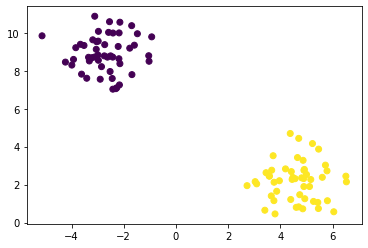

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [73]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

ValueError: ignored

In [75]:
sc_cleanest_df.fit(X,Y)
importance = sc_cleanest_df.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

AttributeError: ignored

Feature: 0, Score: 0.00030
Feature: 1, Score: -0.11676
Feature: 2, Score: -0.05466
Feature: 3, Score: -0.60756
Feature: 4, Score: 0.31218
Feature: 5, Score: -0.06966
Feature: 6, Score: 0.01853
Feature: 7, Score: -0.00733
Feature: 8, Score: -0.05809
Feature: 9, Score: 0.01968
Feature: 10, Score: 0.01447
Feature: 11, Score: 0.01683
Feature: 12, Score: -0.02533
Feature: 13, Score: -0.08066
Feature: 14, Score: -0.00825
Feature: 15, Score: -0.01456
Feature: 16, Score: 0.07116
Feature: 17, Score: -0.12441
Feature: 18, Score: -0.02960
Feature: 19, Score: -0.05369
Feature: 20, Score: -0.10646
Feature: 21, Score: 0.09346
Feature: 22, Score: 0.01353
Feature: 23, Score: -0.09976
Feature: 24, Score: 0.01368
Feature: 25, Score: 0.04130
Feature: 26, Score: -0.09944
Feature: 27, Score: -0.05254
Feature: 28, Score: 0.02716
Feature: 29, Score: -0.00224
Feature: 30, Score: -0.00735
Feature: 31, Score: 0.09494
Feature: 32, Score: 0.08012
Feature: 33, Score: 0.05361
Feature: 34, Score: -0.02469
Feature: 3

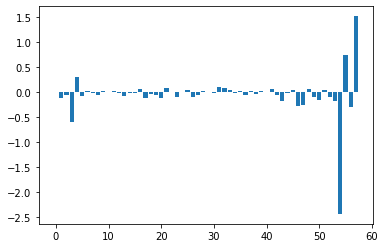

In [80]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
thres = [0.01,0.2, 0.4]

list_features = [x for x in importance if score >= thres]


for threshold in thres:
  list_features 
  df[TYPE].drop(where x in list_features)
  
  
  0.01 acc 60
  0.5 acc 85
  1.0 acc 50